# **Encuesta de Movilidad Social Intergeneracional, EMOVI 2016**


Fuente: INEGI

# *Descripción de los datos*

"El Módulo de Movilidad Social Intergeneracional (MMSI) 2016 se levantó en el tercer y cuarto trimestres de 2016. Tuvo como objetivo generar información estadística sobre movilidad social intergeneracional de la población de 25 a 64 años en México, observando la influencia que tienen características como el nivel educativo, el nivel socioeconómico y la ocupación de los ascendentes económicos"(INEGI,2023)

La encuesta pretendía tener una muestra de 32,481 hogares, siendo al final un total de  25,634 los hogares totales de los cuales se pudo obtener información. Esta muestra se determinó con base en las viviendas con respuesta en la ENH-2016 durante los tercero y cuarto trimestres del año mencionado.


In [3]:
#importamos las librerías necesarias
from google.colab import drive
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# hacemos la lectura del csv

df = pd.read_csv("/content/drive/MyDrive/Maestría /Tercer semestres/Proyecto 1/MMSI_2016.csv")

df.head()

<ipython-input-4-f0231cfab6c3>:3: DtypeWarning: Columns (27,28,30,31,32,33,34,35,49,50,51,52,53,54,55,56,57,58,59,184,185,211,236) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Maestría /Tercer semestres/Proyecto 1/MMSI_2016.csv")


,Folioviv,Foliohog,Id_pobla,ubica_geo_ENH,ent_ENH,tam_loc_ENH,est_socio_ENH,est_dis_ENH,upm_ENH,P1_1,...,cisterna_ENH,pileta_ENH,calent_sol_ENH,calent_gas_ENH,medidor_luz_ENH,bomba_agua_ENH,tanque_gas_ENH,aire_acond_ENH,calefacc_ENH,chimenea_ENH
0,100018005,1,1,10010001,1,1,3,5,1,1,...,1,2,1,1,1,1,1,2,2,2
1,100018006,1,3,10010001,1,1,3,5,1,1,...,1,2,1,1,1,1,1,2,2,2
2,100018036,1,3,10010001,1,1,3,5,1,1,...,1,2,1,1,1,1,1,2,2,2
3,100018068,1,1,10010001,1,1,3,5,1,1,...,1,2,2,1,1,1,1,2,2,2
4,100018092,1,3,10010001,1,1,3,5,1,2,...,1,2,2,1,1,1,2,2,2,2


Como se puede observar, el data set que vamos a utilizar, cuenta con 25634 filas y 254 columnas, por lo tanto al ser una encuesta se dice que contamos con 254 preguntas que se realizaron y 25634 respuestas, sin embaego vamos a tener datos vacios y algunos otros que no se respondieron, es por eso que tenemos que realizar la limpia de la base

In [5]:
# Cantidad de filas y cantidad de columnas
df.shape

(25634, 254)

In [6]:
#descripción de cada una de las varibales
descripción = df.iloc[0].to_dict()
descripción

{'Folioviv': 100018005,
 'Foliohog': 1,
 'Id_pobla': 1,
 'ubica_geo_ENH': 10010001,
 'ent_ENH': 1,
 'tam_loc_ENH': 1,
 'est_socio_ENH': 3,
 'est_dis_ENH': 5,
 'upm_ENH': 1,
 'P1_1': 1,
 'P1_2': 58,
 'P1_3': 1,
 'P2_1EST': '1',
 'P2_1EST_D': 1,
 'P2_1MUN': '2',
 'P2_1MUN_D_C': '001',
 'P2_1LOC': '3',
 'P2_1LOC_D_C': '0001',
 'A2_P2_2': '1',
 'P2_3_1': '1',
 'P2_3_2': '2',
 'P2_3_3': '3',
 'P2_3_4': ' ',
 'P2_3_5': ' ',
 'P2_3_6': ' ',
 'P2_3_7': ' ',
 'P2_3_8': ' ',
 'P2_4': '8',
 'P2_5': '2',
 'P2_5A_PAR_C': ' ',
 'P2_6': '6',
 'P2_7': '3',
 'P2_8': '1',
 'P2_9_1': '1',
 'P2_9_2': '1',
 'P2_9_3': '1',
 'P2_10_1': '1',
 'P2_10_2': '1',
 'P2_10_3': '1',
 'P2_10_4': '1',
 'P2_10_5': '1',
 'P2_10_6': '2',
 'P2_10_7': '2',
 'P2_10_8': ' ',
 'P2_10_9': ' ',
 'P2_10_10': ' ',
 'P2_10_11': ' ',
 'P2_10_12': ' ',
 'P2_10_13': ' ',
 'P2_11_1': '2',
 'P2_11_2': '2',
 'P2_11_3': '1',
 'P2_11_4': '2',
 'P2_11_5': '1',
 'P2_11_6': '2',
 'P2_11_7': '2',
 'P2_11_8': '2',
 'P2_11_9': '2',
 'P2_11_10': 

In [7]:
# Head of database (& drop description's row)
df = df.drop([0])
df.head()

,Folioviv,Foliohog,Id_pobla,ubica_geo_ENH,ent_ENH,tam_loc_ENH,est_socio_ENH,est_dis_ENH,upm_ENH,P1_1,...,cisterna_ENH,pileta_ENH,calent_sol_ENH,calent_gas_ENH,medidor_luz_ENH,bomba_agua_ENH,tanque_gas_ENH,aire_acond_ENH,calefacc_ENH,chimenea_ENH
1,100018006,1,3,10010001,1,1,3,5,1,1,...,1,2,1,1,1,1,1,2,2,2
2,100018036,1,3,10010001,1,1,3,5,1,1,...,1,2,1,1,1,1,1,2,2,2
3,100018068,1,1,10010001,1,1,3,5,1,1,...,1,2,2,1,1,1,1,2,2,2
4,100018092,1,3,10010001,1,1,3,5,1,2,...,1,2,2,1,1,1,2,2,2,2
5,100025011,1,2,10010001,1,1,3,5,2,2,...,2,2,2,1,1,2,2,2,2,2


In [8]:
df.columns

Index(['Folioviv', 'Foliohog', 'Id_pobla', 'ubica_geo_ENH', 'ent_ENH',
       'tam_loc_ENH', 'est_socio_ENH', 'est_dis_ENH', 'upm_ENH', 'P1_1',
       ...
       'cisterna_ENH', 'pileta_ENH', 'calent_sol_ENH', 'calent_gas_ENH',
       'medidor_luz_ENH', 'bomba_agua_ENH', 'tanque_gas_ENH', 'aire_acond_ENH',
       'calefacc_ENH', 'chimenea_ENH'],
      dtype='object', length=254)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25633 entries, 1 to 25633
Columns: 254 entries, Folioviv to chimenea_ENH
dtypes: int64(108), object(146)
memory usage: 49.7+ MB


In [10]:
df.describe()

,Folioviv,Foliohog,Id_pobla,ubica_geo_ENH,ent_ENH,tam_loc_ENH,est_socio_ENH,est_dis_ENH,upm_ENH,P1_1,...,cisterna_ENH,pileta_ENH,calent_sol_ENH,calent_gas_ENH,medidor_luz_ENH,bomba_agua_ENH,tanque_gas_ENH,aire_acond_ENH,calefacc_ENH,chimenea_ENH
count,2.563300e+04,25633.000000,25633.000000,2.563300e+04,25633.000000,25633.000000,25633.000000,25633.000000,25633.000000,25633.000000,...,25633.000000,25633.000000,25633.000000,25633.000000,25633.000000,25633.000000,25633.000000,25633.000000,25633.000000,25633.000000
mean,1.671166e+09,1.012874,1.665977,1.657818e+08,16.540280,2.181758,2.197753,142.756603,2114.340030,1.574455,...,1.806968,1.616666,1.951781,1.591737,1.066282,1.767877,1.903328,1.801545,1.976710,1.972379
std,9.254605e+08,0.125506,0.862326,9.244337e+07,9.233905,1.232401,0.834283,85.701365,1161.044141,0.494435,...,0.394686,0.486208,0.214233,0.491522,0.248779,0.422195,0.295517,0.398844,0.150827,0.163887
min,1.000180e+08,1.000000,1.000000,1.001000e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,9.016361e+08,1.000000,1.000000,9.003000e+07,9.000000,1.000000,2.000000,69.000000,1112.000000,1.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,1.700163e+09,1.000000,2.000000,1.700400e+08,17.000000,2.000000,2.000000,141.000000,2105.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,2.500717e+09,1.000000,2.000000,2.500100e+08,25.000000,3.000000,3.000000,220.000000,3113.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,3.260791e+09,4.000000,15.000000,3.205700e+08,32.000000,4.000000,4.000000,294.000000,4053.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


# *Limpieza de los datos*

In [11]:
# Eliminación de variables

variables_a_eliminar = ['Folioviv','Foliohog', 'Id_pobla', 'ubica_geo_ENH', 'est_dis_ENH', 'upm_ENH']
df = df.drop(variables_a_eliminar, axis=1)

In [12]:
df

,ent_ENH,tam_loc_ENH,est_socio_ENH,P1_1,P1_2,P1_3,P2_1EST,P2_1EST_D,P2_1MUN,P2_1MUN_D_C,...,cisterna_ENH,pileta_ENH,calent_sol_ENH,calent_gas_ENH,medidor_luz_ENH,bomba_agua_ENH,tanque_gas_ENH,aire_acond_ENH,calefacc_ENH,chimenea_ENH
1,1,1,3,1,49,3,,7,,089,...,1,2,1,1,1,1,1,2,2,2
2,1,1,3,1,31,3,1,1,2,001,...,1,2,1,1,1,1,1,2,2,2
3,1,1,3,1,56,1,1,1,2,001,...,1,2,2,1,1,1,1,2,2,2
4,1,1,3,2,52,3,1,1,2,001,...,1,2,2,1,1,1,2,2,2,2
5,1,1,3,2,31,2,1,1,2,001,...,2,2,2,1,1,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25629,32,4,2,2,26,3,1,32,2,035,...,1,2,1,1,1,1,2,2,2,2
25630,32,4,2,1,36,3,1,32,2,035,...,2,2,2,1,1,2,2,2,2,2
25631,32,4,2,2,44,1,1,32,2,035,...,2,2,1,1,1,1,1,2,2,2
25632,32,4,2,1,27,1,1,32,2,035,...,1,2,2,1,1,2,2,2,2,2


In [13]:
df_sin_filas_vacias = df.dropna()

# Mostrar las primeras filas del DataFrame después de eliminar filas vacías
df_sin_filas_vacias.head()


,ent_ENH,tam_loc_ENH,est_socio_ENH,P1_1,P1_2,P1_3,P2_1EST,P2_1EST_D,P2_1MUN,P2_1MUN_D_C,...,cisterna_ENH,pileta_ENH,calent_sol_ENH,calent_gas_ENH,medidor_luz_ENH,bomba_agua_ENH,tanque_gas_ENH,aire_acond_ENH,calefacc_ENH,chimenea_ENH
1,1,1,3,1,49,3,,7,,089,...,1,2,1,1,1,1,1,2,2,2
2,1,1,3,1,31,3,1,1,2,001,...,1,2,1,1,1,1,1,2,2,2
3,1,1,3,1,56,1,1,1,2,001,...,1,2,2,1,1,1,1,2,2,2
4,1,1,3,2,52,3,1,1,2,001,...,1,2,2,1,1,1,2,2,2,2
5,1,1,3,2,31,2,1,1,2,001,...,2,2,2,1,1,2,2,2,2,2


In [14]:

df = pd.read_csv("/content/drive/MyDrive/Maestría /Tercer semestres/Proyecto 1/PROYECTO EDA/emovi_sinvacios.csv")

In [15]:
df

,tam_loc_enh,est_socio_enh,genero,edad,parentesco,Residencia,esc-padre,Lengua_ing_m,esc_madre,esc-entrevistado,prom_edu_padre,dif_escp_esm,dif_resi
0,1,3,1,58,1,1.0,2,2,6,10,5.0,-4,0
1,1,3,1,49,3,NaN,10,2,3,11,11.0,7,1
2,1,3,1,31,3,1.0,10,2,3,10,11.0,7,0
3,1,3,1,56,1,1.0,2,2,6,2,5.0,-4,0
4,1,3,2,52,3,1.0,2,2,6,10,5.0,-4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13163,4,2,1,41,1,1.0,2,2,3,7,3.0,-1,1
13164,4,2,2,31,2,1.0,2,2,3,4,3.0,-1,1
13165,4,2,2,29,2,1.0,2,2,6,3,5.0,-4,1
13166,4,2,2,26,3,1.0,3,2,4,10,5.0,-1,1


# *Valores Faltantes*

In [16]:
# Revisión de los valores faltantes
df.isnull().sum()

tam_loc_enh            0
est_socio_enh          0
genero                 0
edad                   0
parentesco             0
Residencia          2820
esc-padre              0
Lengua_ing_m           0
esc_madre              0
esc-entrevistado       0
prom_edu_padre       125
dif_escp_esm           0
dif_resi               0
dtype: int64

In [17]:
 # actualizar index de base de datos
df.reset_index(drop=True, inplace=True)

In [18]:
df.dtypes

tam_loc_enh           int64
est_socio_enh         int64
genero                int64
edad                  int64
parentesco            int64
Residencia          float64
esc-padre             int64
Lengua_ing_m          int64
esc_madre             int64
esc-entrevistado      int64
prom_edu_padre      float64
dif_escp_esm          int64
dif_resi              int64
dtype: object

In [19]:
print(df)

       tam_loc_enh  est_socio_enh  genero  edad  parentesco  Residencia  \
0                1              3       1    58           1         1.0   
1                1              3       1    49           3         NaN   
2                1              3       1    31           3         1.0   
3                1              3       1    56           1         1.0   
4                1              3       2    52           3         1.0   
...            ...            ...     ...   ...         ...         ...   
13163            4              2       1    41           1         1.0   
13164            4              2       2    31           2         1.0   
13165            4              2       2    29           2         1.0   
13166            4              2       2    26           3         1.0   
13167            4              2       1    36           3         1.0   

       esc-padre  Lengua_ing_m  esc_madre  esc-entrevistado  prom_edu_padre  \
0              2    

# *Visualización de datos*

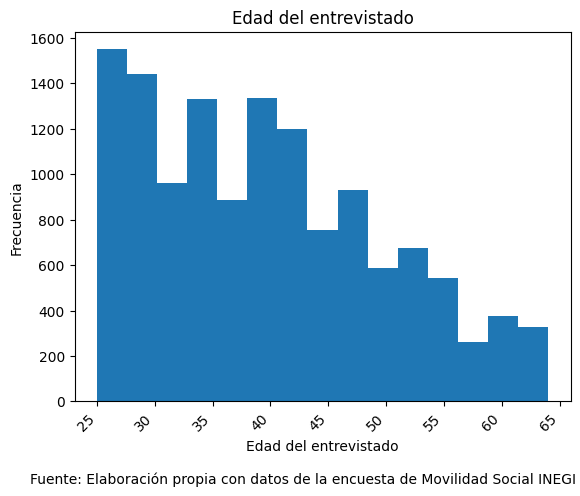

In [20]:
plt.hist(df['edad'], bins = 15)
plt.savefig("histograma.png", dpi=100)
plt.xlabel("Edad (Años)")
plt.ylabel("Frecuencia")
plt.title("Edad del entrevistado")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Edad del entrevistado\n\nFuente: Elaboración propia con datos de la encuesta de Movilidad Social INEGI 2016")

plt.savefig("Grados estudio ent.png")

plt.show()

    esc-entrevistado  frecuencia
0                  3        3597
1                 10        3247
2                  4        2765
3                  2        1719
4                  7         897
5                 11         456
6                  9         164
7                  8         104
8                  5          96
9                 12          59
10                 6          56
11                 0           6
12                 1           2


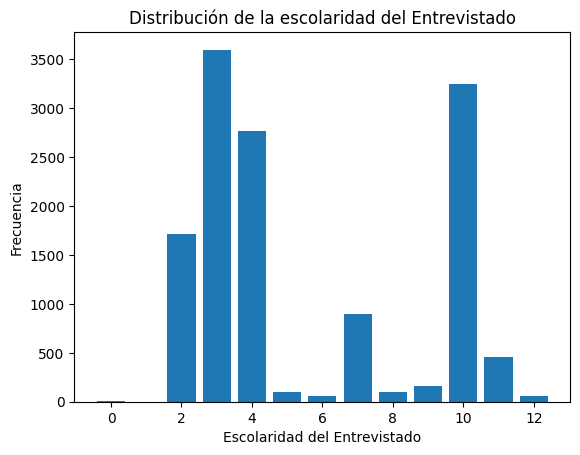

In [21]:
frecuencia_escolaridad = df['esc-entrevistado'].value_counts()

# Convertir el resultado en un DataFrame
df_frecuencia = pd.DataFrame({'esc-entrevistado': frecuencia_escolaridad.index, 'frecuencia': frecuencia_escolaridad.values})

# Mostrar el DataFrame de frecuencia
print(df_frecuencia)

# Crear el gráfico de barras
plt.bar(df_frecuencia['esc-entrevistado'], df_frecuencia['frecuencia'])
plt.xlabel('Escolaridad del Entrevistado')
plt.ylabel('Frecuencia')
plt.title('Distribución de la escolaridad del Entrevistado')
plt.show()

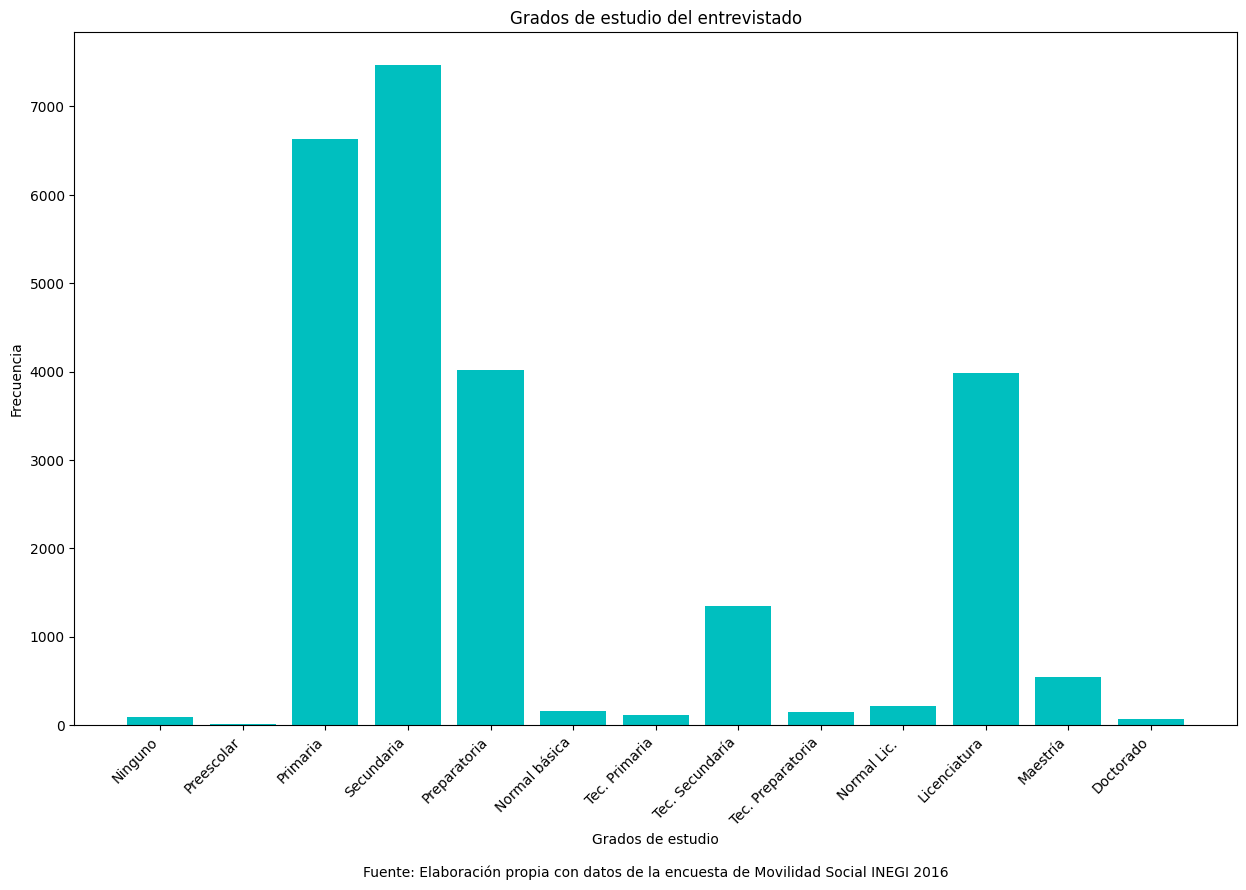

In [22]:

plt.figure(figsize=(15,9))

x = ["Ninguno", "Preescolar", "Primaria", "Secundaria", "Preparatoria", "Normal básica", "Tec. Primaria", "Tec. Secundaría", "Tec. Preparatoria", "Normal Lic. ", "Licenciatura", "Maestría", "Doctorado"]

y = [95, 15, 6631, 7470, 4017, 152, 115, 1344, 144, 215, 3978, 547, 69]


plt.bar(x, y, color= "c")
plt.xlabel("Grados de estudio")
plt.ylabel("Frecuencia")
plt.title("Grados de estudio del entrevistado")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Grados de estudio\n\nFuente: Elaboración propia con datos de la encuesta de Movilidad Social INEGI 2016")

plt.savefig("Grados estudio ent.png")

plt.show()

   est_socio_enh  frecuencia
0              2        6602
1              3        3476
2              4        1710
3              1        1380


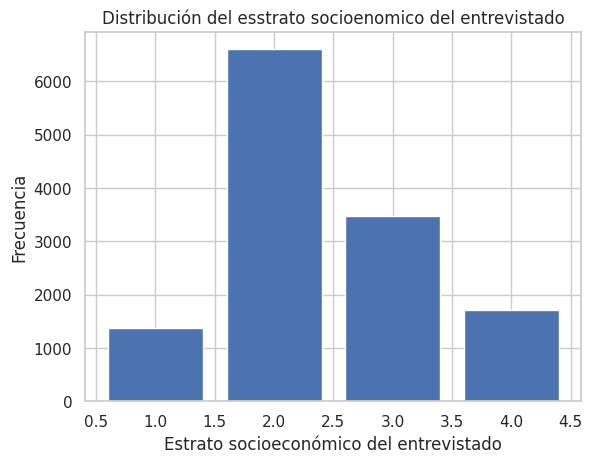

In [34]:

frecuencia_escolaridad = df['est_socio_enh'].value_counts()

# Convertir el resultado en un DataFrame
df_frecuencia = pd.DataFrame({'est_socio_enh': frecuencia_escolaridad.index, 'frecuencia': frecuencia_escolaridad.values})

# Mostrar el DataFrame de frecuencia
print(df_frecuencia)

# Crear el gráfico de barras
plt.bar(df_frecuencia['est_socio_enh'], df_frecuencia['frecuencia'])
plt.xlabel('Estrato socioeconómico del entrevistado')
plt.ylabel('Frecuencia')
plt.title('Distribución del esstrato socioenomico del entrevistado')
plt.show()

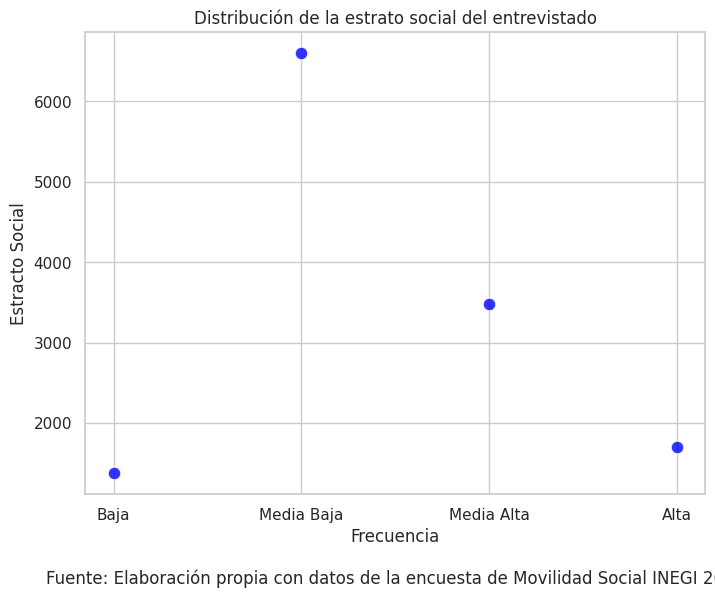

In [32]:
x = ["Baja", "Media Baja", "Media Alta", "Alta"]
y = [1380, 6602, 3476, 1710]


# Configura el estilo de Seaborn (opcional)
sns.set(style="whitegrid")

# Crea el gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x, y=y, color='blue', s=80, alpha=0.8)


# Personaliza el gráfico
plt.title('Distribución de la estrato social del entrevistado')
plt.xlabel('Frecuencia\n\nFuente: Elaboración propia con datos de la encuesta de Movilidad Social INEGI 2016')
plt.ylabel('Estracto Social')

# Muestra el gráfico
plt.show()


# *Referencias*

https://www.inegi.org.mx/contenidos/programas/mmsi/2016/doc/principales_resultados_mmsi_2016.pdf


https://www.inegi.org.mx/programas/mmsi/2016/#microdatos

https://ceey.org.mx/

